In [1]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163335 sha256=b6290aef9f1faaddf1a6506afe27a76d48f3d0c605998566934040120ccea866
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, NMF
# from google.colab import files
# uploaded = files.upload()
# import io
# df=pd.read_csv(io.BytesIO(uploaded['ratings_small.csv']))
df=pd.read_csv('ratings_small.csv')
df.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
reader = Reader()
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
train, test = train_test_split(data, test_size=0.25, random_state=1)

Trying different number of factors to see if this parameter affects the performance of the model.  
The default number of factors is 100, hence we will tweak the number of factors from 1-100 to evaluate the performance.

In [4]:
import time
from collections import defaultdict

# A dictionary to store the rsme, fit time and prediction time 
nmf_dict = defaultdict(dict)
for i in range(100):
    nmf = NMF(n_factors=i+1)
    start_time = time.time()
    nmf.fit(train)
    fit_time = time.time() - start_time
    predictions = nmf.test(test)
    nmf_dict[i+1]['rmse'] = rmse(predictions)
    nmf_dict[i+1]['fit_time'] = fit_time
    nmf_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

# A dataframe to store the results
nmf_df = pd.DataFrame(nmf_dict)
nmf_df

RMSE: 1.2670
RMSE: 1.1848
RMSE: 1.1134
RMSE: 1.0737
RMSE: 1.0452
RMSE: 1.0151
RMSE: 0.9982
RMSE: 0.9867
RMSE: 0.9791
RMSE: 0.9679
RMSE: 0.9588
RMSE: 0.9589
RMSE: 0.9560
RMSE: 0.9503
RMSE: 0.9523
RMSE: 0.9479
RMSE: 0.9487
RMSE: 0.9552
RMSE: 0.9487
RMSE: 0.9508
RMSE: 0.9526
RMSE: 0.9491
RMSE: 0.9530
RMSE: 0.9583
RMSE: 0.9596
RMSE: 0.9593
RMSE: 0.9595
RMSE: 0.9609
RMSE: 0.9619
RMSE: 0.9678
RMSE: 0.9642
RMSE: 0.9720
RMSE: 0.9695
RMSE: 0.9739
RMSE: 0.9702
RMSE: 0.9732
RMSE: 0.9779
RMSE: 0.9784
RMSE: 0.9813
RMSE: 0.9807
RMSE: 0.9805
RMSE: 0.9842
RMSE: 0.9874
RMSE: 0.9881
RMSE: 0.9879
RMSE: 0.9933
RMSE: 0.9966
RMSE: 0.9965
RMSE: 0.9996
RMSE: 0.9974
RMSE: 0.9986
RMSE: 1.0028
RMSE: 1.0050
RMSE: 1.0044
RMSE: 1.0093
RMSE: 1.0104
RMSE: 1.0069
RMSE: 1.0107
RMSE: 1.0108
RMSE: 1.0113
RMSE: 1.0115
RMSE: 1.0158
RMSE: 1.0181
RMSE: 1.0175
RMSE: 1.0198
RMSE: 1.0230
RMSE: 1.0207
RMSE: 1.0231
RMSE: 1.0303
RMSE: 1.0274
RMSE: 1.0261
RMSE: 1.0302
RMSE: 1.0298
RMSE: 1.0333
RMSE: 1.0338
RMSE: 1.0318
RMSE: 1.0364

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,1.266973,1.184836,1.113438,1.073691,1.045186,1.015063,0.998216,0.986727,0.979121,0.967873,...,1.056561,1.053355,1.050613,1.055013,1.054346,1.055860,1.056142,1.057395,1.061090,1.058016
fit_time,1.112150,1.089522,1.088760,1.127723,1.182204,1.204453,1.162320,1.236416,1.265456,1.231856,...,3.736308,3.749163,4.678665,4.414989,4.610438,4.459527,4.556092,4.123012,4.148238,4.080600
prediction_time,0.183393,0.115403,0.196054,0.102134,0.164244,0.136206,0.098620,0.149344,0.101626,0.185054,...,0.145588,0.104914,0.233276,0.113617,0.126209,0.178747,0.100129,0.146661,0.102471,0.178040


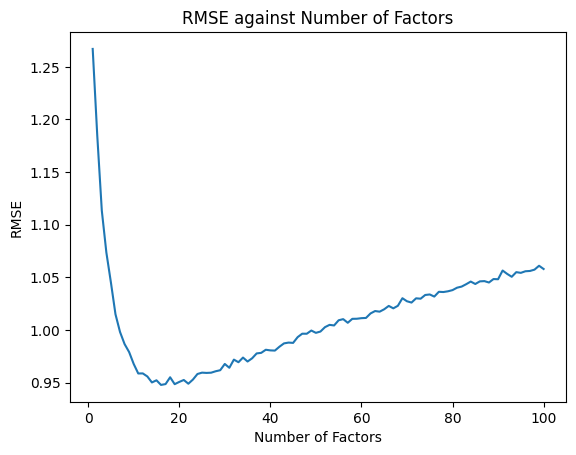

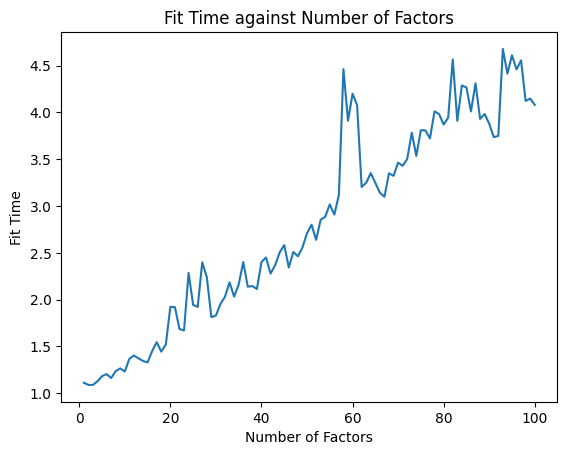

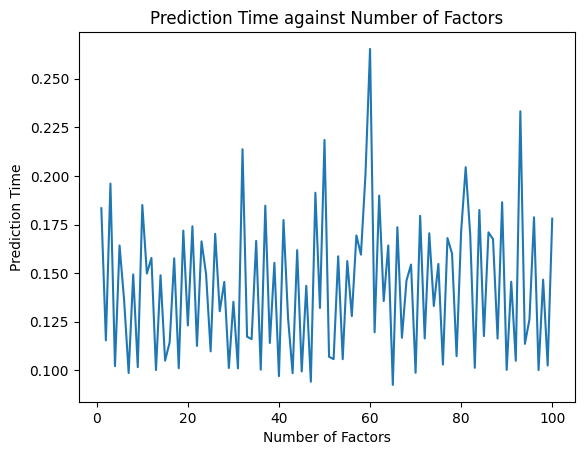

In [5]:
# Plot the RMSE, fit time and prediction time against the number of factors
import matplotlib.pyplot as plt
plt.plot(nmf_df.loc['rmse'])
plt.xlabel('Number of Factors')
plt.ylabel('RMSE')
plt.title('RMSE against Number of Factors')
plt.show()

plt.plot(nmf_df.loc['fit_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Fit Time')
plt.title('Fit Time against Number of Factors')
plt.show()

plt.plot(nmf_df.loc['prediction_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Prediction Time')
plt.title('Prediction Time against Number of Factors')
plt.show()


We will be using the default parameters set in the NMF for our comparison between the different algorithms.

In [ ]:
from surprise import NMF
import time
nmf = NMF()
begin_fit = time.time()
nmf.fit(train)
end_fit = time.time()
begin_predict = time.time()
end_predict = time.time()
nmf.test(test)
result = rmse(nmf.test(test))
row = {"Algorithm":"NMF","Fit Time":end_fit-begin_fit,"Prediction Time":end_predict-begin_predict}
print(row)

RMSE: 0.9511
{'Algorithm': 'NMF', 'Fit Time': 2.6431522369384766, 'Prediction Time': 3.457069396972656e-05}


In [ ]:
testdf = pd.DataFrame(test)
testdf = testdf.rename(columns={
    0: "UserId",
    1: "MovieId",
    2: "Actual Rating"
})
testdf["Predicted Rating"] = -1
testdf["Error"] = -1
for index, row in testdf.iterrows():
  testdf.loc[index, 'Predicted Rating'] = nmf.predict(row["UserId"], row["MovieId"], row["Actual Rating"]).est
for index, row in testdf.iterrows():
  testdf.loc[index, 'Error'] = (abs(row["Predicted Rating"] - row["Actual Rating"]))

testdf

,UserId,MovieId,Actual Rating,Predicted Rating,Error
0,387,3801,4.0,3.346933,0.653067
1,534,507,4.0,3.871152,0.128848
2,480,8874,5.0,3.919175,1.080825
3,575,3469,4.0,4.476100,0.476100
4,214,1219,4.0,4.200861,0.200861
...,...,...,...,...,...
24996,367,2858,3.5,4.204642,0.704642
24997,654,33794,4.5,4.445635,0.054365
24998,30,903,4.0,4.305344,0.305344
24999,537,1188,5.0,3.800925,1.199075


In [ ]:
predictions = testdf.sort_values(by='Error',ascending=True)
predictions

,UserId,MovieId,Actual Rating,Predicted Rating,Error
19101,57,858,5.0,5.000000,0.000000
12882,414,1636,1.0,1.000000,0.000000
24498,654,1196,5.0,5.000000,0.000000
7198,102,2548,1.0,1.000000,0.000000
21758,78,26712,5.0,5.000000,0.000000
...,...,...,...,...,...
8733,418,778,0.5,4.589042,4.089042
20382,599,71033,0.5,4.691633,4.191633
6047,296,3552,0.5,4.824131,4.324131
24336,546,1235,0.5,5.000000,4.500000


In [ ]:
predictions.Error[predictions.Error < 0.25].count()/len(predictions)

0.2263909443622255

In [ ]:
predictions.Error.mean()

0.7359508122654415